In [12]:
import pandas as pd
import seaborn as sns
from scipy import stats

In [13]:
# load file
data = pd.read_csv("SDM_player_gdp_pop_int.csv")
# data type settings
data = pd.DataFrame(data)
data["GPI_CNT_PLAYER_ID"] = data["GPI_CNT_PLAYER_ID"].astype(int)
data["GPI_CNT_PLAYERS_ON_1MIL_POP"] = data["GPI_CNT_PLAYERS_ON_1MIL_POP"].astype(float)
data["GPI_AVG_GDP_PER_CAPITA"] = data["GPI_AVG_GDP_PER_CAPITA"].astype(float)
data["GPI_AVG_POPULATION"] = data["GPI_AVG_POPULATION"].astype(float)
data["GPI_AVG_POPULATION_AGED_15TO29"] = data["GPI_AVG_POPULATION_AGED_15TO29"].astype(float)
data["GPI_AVG_SHARE_OF_INDIVIDUALS_USING_INTERNET"] = data["GPI_AVG_SHARE_OF_INDIVIDUALS_USING_INTERNET"].astype(float)
# text columns must be excluded
data.drop(["GPI_COUNTRY","GPI_CONTINENT"], axis='columns', inplace=True)

# Rename columns
data = data.rename(columns={"GPI_CNT_PLAYER_ID": "Počet hráčů", "GPI_CNT_PLAYERS_ON_1MIL_POP": "Počet hráčů/mil. obyvatel", "GPI_AVG_GDP_PER_CAPITA": "Prům. výše HDP na obyvatele", "GPI_AVG_POPULATION": "Prům. počet obyvatel", "GPI_AVG_POPULATION_AGED_15TO29": "Prům. počet obyv. ve věku 15-19 let", "GPI_AVG_SHARE_OF_INDIVIDUALS_USING_INTERNET": "Prům. procento obyvatel užívajících internet"})
# print the first records
print(data.head())


   Počet hráčů  Prům. výše HDP na obyvatele  Prům. počet obyvatel  \
0        14367                  55010.10600          3.074545e+08   
1          278                  20480.95492          1.694012e+07   
2          433                  75318.59032          4.932737e+06   
3           46                  32755.17544          3.641419e+06   
4          241                  16945.56732          7.616652e+06   

   Prům. počet obyv. ve věku 15-19 let  Počet hráčů/mil. obyvatel  \
0                          63724738.16                  46.728859   
1                           4078430.80                  16.410745   
2                           1050609.88                  87.780874   
3                            768541.52                  12.632438   
4                           1433051.88                  31.641200   

   Prům. procento obyvatel užívajících internet  
0                                     66.607520  
1                                     44.663870  
2                   

<Axes: xlabel='Prům. počet obyvatel', ylabel='Počet hráčů'>

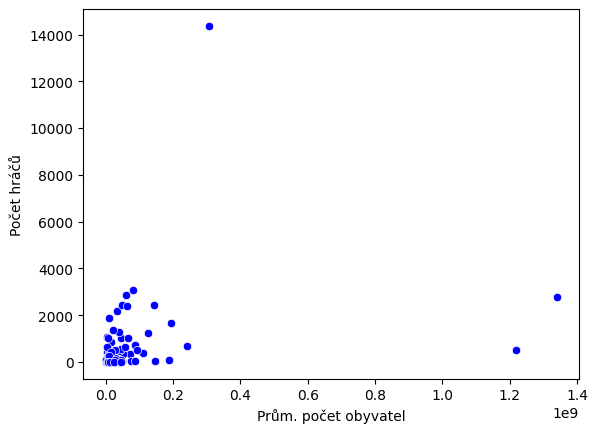

In [14]:
sns.scatterplot(data=data, x="Prům. počet obyvatel", y="Počet hráčů", color="blue")

<Axes: xlabel='Prům. počet obyv. ve věku 15-19 let', ylabel='Počet hráčů'>

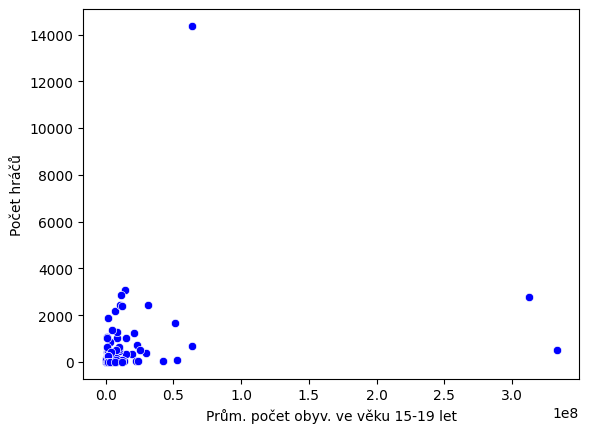

In [15]:
sns.scatterplot(data=data, x="Prům. počet obyv. ve věku 15-19 let", y="Počet hráčů", color="blue")

<Axes: xlabel='Prům. výše HDP na obyvatele', ylabel='Počet hráčů/mil. obyvatel'>

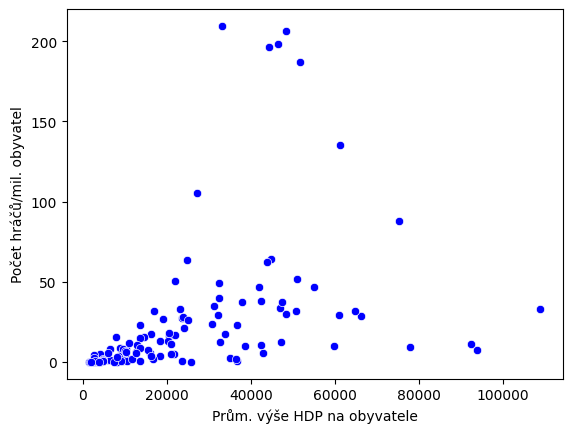

In [16]:
sns.scatterplot(data=data, x="Prům. výše HDP na obyvatele", y="Počet hráčů/mil. obyvatel", color="blue")

<Axes: xlabel='Prům. procento obyvatel užívajících internet', ylabel='Počet hráčů/mil. obyvatel'>

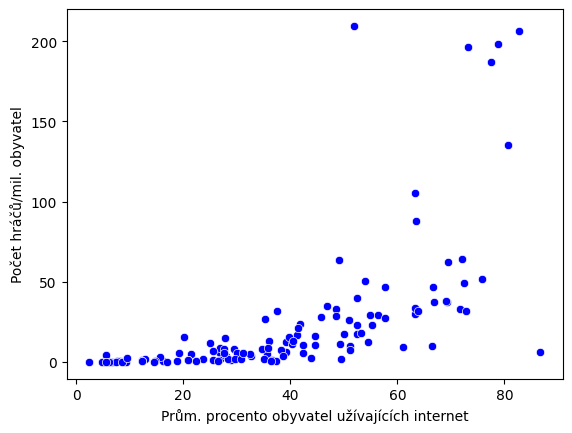

In [17]:
sns.scatterplot(data=data, x="Prům. procento obyvatel užívajících internet", y="Počet hráčů/mil. obyvatel", color="blue")

In [18]:
# test for normal data distribution:
# normal distribution is always tested for one column of the table
# We observe the p-value
"""
The p-value expresses the probability that the value of the test statistic would, 
that is at least as large as the observed value would occur by chance if the data came from a normal population.
In general, if the p-value is less than the chosen significance level, then it is considered statistically significant. 
This means that the observed data is unlikely to have appeared by chance if the data came from a normal population.
The choice of significance level is a subjective decision. In general, a significance level of 0.05 is considered standard. 
That is, if the p-value is less than 0.05, then it is considered statistically significant.
"""
print(stats.normaltest(data["Počet hráčů"]))
print(stats.normaltest(data["Počet hráčů/mil. obyvatel"]))
print(stats.normaltest(data["Prům. výše HDP na obyvatele"]))
print(stats.normaltest(data["Prům. počet obyvatel"]))
print(stats.normaltest(data["Prům. počet obyv. ve věku 15-19 let"]))
print(stats.normaltest(data["Prům. procento obyvatel užívajících internet"]))

NormaltestResult(statistic=225.09172698161382, pvalue=1.3241967721243712e-49)
NormaltestResult(statistic=107.58764136839392, pvalue=4.3415071076559595e-24)
NormaltestResult(statistic=38.56032073757092, pvalue=4.233823426609993e-09)
NormaltestResult(statistic=202.5601007432329, pvalue=1.0342677828014017e-44)
NormaltestResult(statistic=203.0852987523566, pvalue=7.954038670598638e-45)
NormaltestResult(statistic=9.833171528727362, pvalue=0.0073240943909007915)


In [19]:
## FINDING THE CORRELATION VALUE
# statistic - the higher it is the stronger is the correlation
print(stats.kendalltau(data["Prům. počet obyvatel"], data["Počet hráčů"]))
print(stats.kendalltau(data["Prům. procento obyvatel užívajících internet"], data["Počet hráčů/mil. obyvatel"]))

SignificanceResult(statistic=0.3702218659989922, pvalue=1.1089236960257302e-09)
SignificanceResult(statistic=0.6908387096774193, pvalue=3.1152834988283753e-30)


In [20]:
## FINDING THE CORRELATION VALUE
# statistic - the higher it is, the stronger is the correlation
print(stats.kendalltau(data["Prům. počet obyv. ve věku 15-19 let"], data["Počet hráčů"]))
print(stats.kendalltau(data["Prům. výše HDP na obyvatele"], data["Počet hráčů/mil. obyvatel"]))

SignificanceResult(statistic=0.30977218500546366, pvalue=3.4318329221465256e-07)
SignificanceResult(statistic=0.5793548387096774, pvalue=9.537725301391349e-22)
